### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

#plotting
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

#sklearn
from sklearn.preprocessing import MinMaxScaler

#avoid warnings
import warnings
warnings.filterwarnings('ignore')

### Prepare Environment

Read the csv file

In [2]:
df = pd.read_csv("Dataset/AIA_Churn_Modelling_Case_Study.csv")

### Exploratory Data Analysis

Understanding

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
## checking shape of dataset
df.shape

(7043, 21)

In [5]:
## checking the all the columns of dataset
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
#Display the value information including count and Dtype for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# get the statistical summary on numeric features of the dataset
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
 # The unique values for every feature are printed to the console to get a deeper understanding about the feature values.

for i in df.columns:
    print(f"Unique {i}'s count: {df[i].unique()}")
    print(f"{df[i].unique()}")

Unique customerID's count: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unique gender's count: ['Female' 'Male']
['Female' 'Male']
Unique SeniorCitizen's count: [0 1]
[0 1]
Unique Partner's count: ['Yes' 'No']
['Yes' 'No']
Unique Dependents's count: ['No' 'Yes']
['No' 'Yes']
Unique tenure's count: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Unique PhoneService's count: ['No' 'Yes']
['No' 'Yes']
Unique MultipleLines's count: ['No phone service' 'No' 'Yes']
['No phone 

Meaning of Features

While inspecting the columns and their unique values, a general understanding about the features can be build. The features can also be clustered into different categories:

Classification labels

1. Churn — Whether the customer churned or not (Yes or No)

Customer services booked

1. PhoneService — Whether the customer has a phone service (Yes, No)
2. MultipleLines — Whether the customer has multiple lines (Yes, No, No phone service)
3. InternetService — Customer’s internet service provider (DSL, Fiber optic, No)
4. OnlineSecurity — Whether the customer has online security (Yes, No, No internet service)
5. OnlineBackup — Whether the customer has online backup (Yes, No, No internet service)
6. DeviceProtection — Whether the customer has device protection (Yes, No, No internet service)
7. TechSupport — Whether the customer has tech support (Yes, No, No internet service)
8. StreamingTV — Whether the customer has streaming TV (Yes, No, No internet service)
9. StreamingMovies — Whether the customer has streaming movies (Yes, No, No internet service)

Customer account information

1. Tenure — Number of months the customer has stayed with the company
2. Contract — The contract term of the customer (Month-to-month, One year, Two year)
4. PaymentMethod — The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
5. MonthlyCharges — The amount charged to the customer monthly
6. TotalCharges — The total amount charged to the customer

Customers demographic info

1. customerID — Customer ID
2. Gender — Whether the customer is a male or a female
3. SeniorCitizen — Whether the customer is a senior citizen or not (1, 0)
4. Partner — Whether the customer has a partner or not (Yes, No)
5. Dependents — Whether the customer has dependents or not (Yes, No)

Data Preprocessing for EDA

In [9]:
# Converting TotalCharges to a numerical data type.
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [10]:
# count of NA values in each column
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
# Let us capture all the nan values in percentage
features_nan = [feature for feature in df.columns if df[feature].isnull().any()]

for feature in features_nan:
    print(round(df[feature].isnull().sum()/df.shape[0]*100,3))

0.156


The analysis shows 11 missing values for “TotalCharges” which means 0.16%. since its a very tiny number, we can safely remove it.

#### Hypothesis Building
Looking at the features included in data and connecting them to their potential influence on customer churn, the following hypotheses can be made:
1. The longer the contract duration the less likely it is that the customer will churn as he/she is less frequently confronted with the termination/prolongation decision and potentially values contracts with reduced effort.
2. Customers are willing to cancel simple contracts with few associated product components quicker and more often than complexer product bundles — for bundles customers value the reduced administrative complexity. They might also be hesitant to cancel a contract, when they depend on the additional service components (e.g. security packages).
3. Customers with spouses and children might churn less to keep the services running for their family.
4. Tenure, contract duration terms and number of additional services are assumed to be among the most important drivers of churn.
5. More expensive contracts lead to increased churn as the chances to save money by changing providers might be higher.
6. Senior citizens tend to churn less due to the extended effort associated with terminating contracts.

### Data Exploration

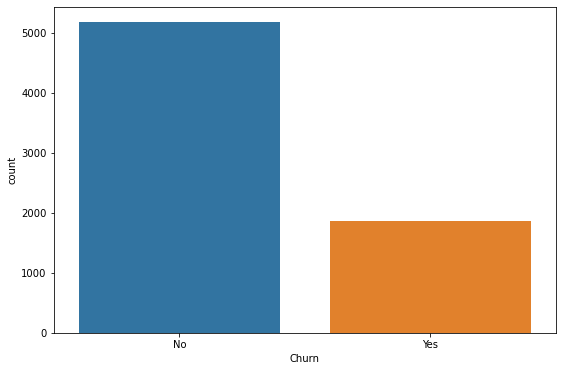

In [12]:
# Display the frequency distribution for churnl
plt.figure(figsize=(9,6))
ax = sns.countplot(x='Churn', data=df)
plt.show()

The plot shows a class imbalance of the data between churners and non-churners. To address this, resampling would be a suitable approach. To keep this case simple, the imbalance is kept forward and specific metrics are chosen for model evaluations.

In [13]:
# Create a function to generate boxplots.
plots = {1 : [111], 2: [121, 122], 3: [131, 132, 133], 4: [221, 222, 223, 224], 5: [231, 232, 233, 234, 235], 6: [231, 232, 233, 234, 235, 236]}

def boxplot(x, y, df):
    
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])
    plt.figure(figsize=(7*columns, 7*rows))
    
    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.boxplot(x=x, y=j, data=df[[x, j]], linewidth=1)
        ax.set_title(j)
    return plt.show()

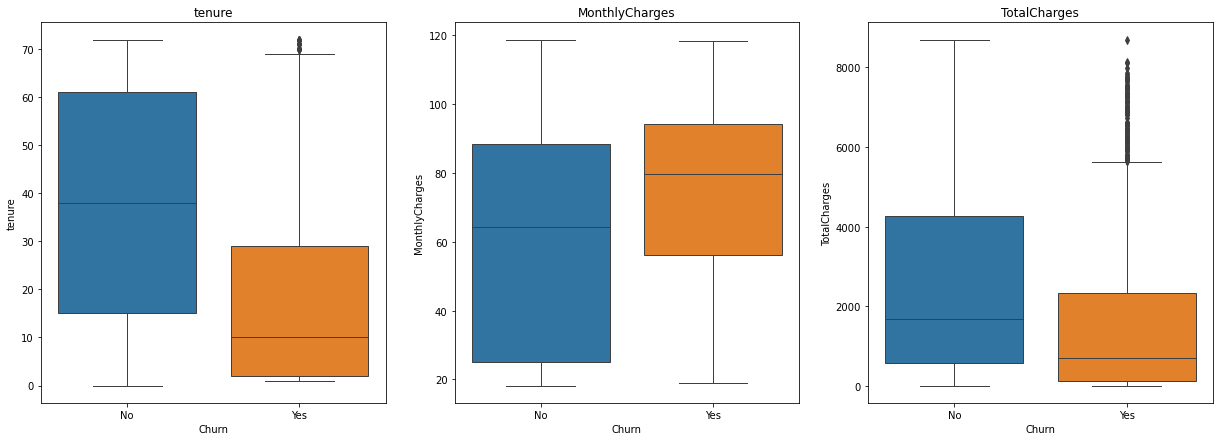

In [14]:
# box plot 
 
boxplot("Churn",["tenure","MonthlyCharges","TotalCharges"],df,)

### Plot insights:

1. Churning customers have much lower tenure with a median of 10 months compared to a median of non-churners of 38 months.
2. Churning customers have higher monthly charges with a median of 80 USD and much lower interquartile range compared to that of non-churners median of 65 USD.
3. TotalCharges are the result of tenure and MonthlyCharges, which are more insightful on an individual basis.


<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

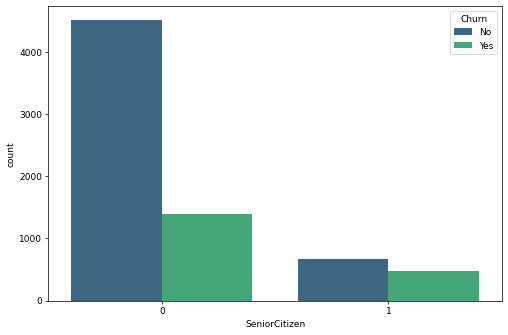

In [15]:
# plot shows the distribution of the churn on the Senior Citizen feature.

plt.figure(figsize=(9,6), dpi=65)
sns.countplot(data=df,x='SeniorCitizen',hue='Churn',palette='viridis')

Plot insights:
* Senior citizens churn rate is much higher than non-senior churn rate.

<AxesSubplot:xlabel='Contract', ylabel='count'>

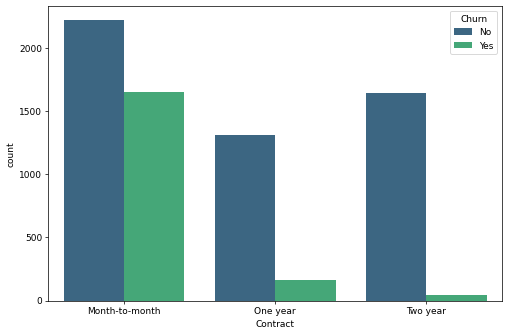

In [16]:
# plot shows the distribution of the churn on the Contract feature.

plt.figure(figsize=(9,6),dpi=65)
sns.countplot(data=df,x='Contract',hue='Churn',palette='viridis')

Plot insights:
* Churn rate for month-to-month contracts much higher that for other contract durations.

<AxesSubplot:xlabel='Partner', ylabel='count'>

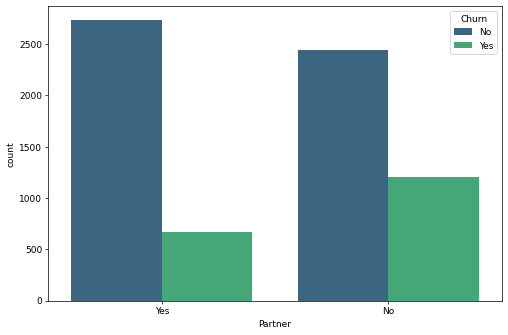

In [17]:
# plot shows the distribution of the churn on the Partner feature.

plt.figure(figsize=(9,6),dpi=65)
sns.countplot(data=df,x='Partner',hue='Churn',palette='viridis')

Plot insights:
* Moderately higher churn rate for customers without partners.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

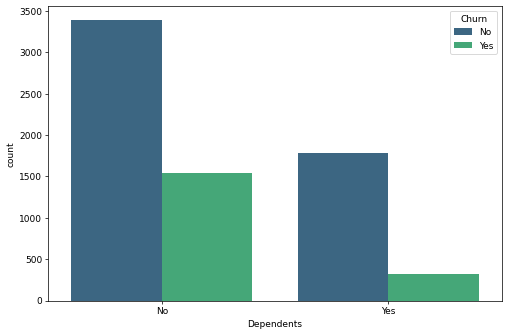

In [18]:
# plot shows the distribution of the churn on the Dependents feature.
plt.figure(figsize=(9,6),dpi=65)
sns.countplot(data=df,x='Dependents',hue='Churn',palette='viridis')

Plot insights:
* Much higher churn rate for customers without children.

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

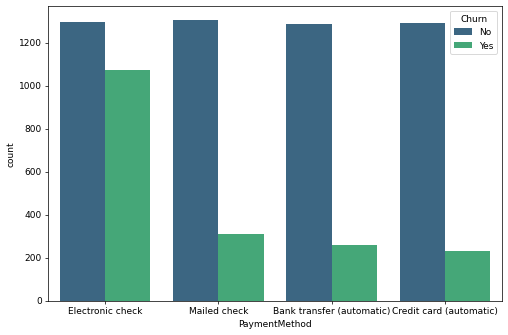

In [19]:
# plot shows the distribution of the churn on the Payment Method feature.

plt.figure(figsize=(9,6),dpi=65)
sns.countplot(data=df,x='PaymentMethod',hue='Churn',palette='viridis')

Plot insights:
* Payment method electronic check shows much higher churn rate than other payment methods.

<AxesSubplot:xlabel='InternetService', ylabel='count'>

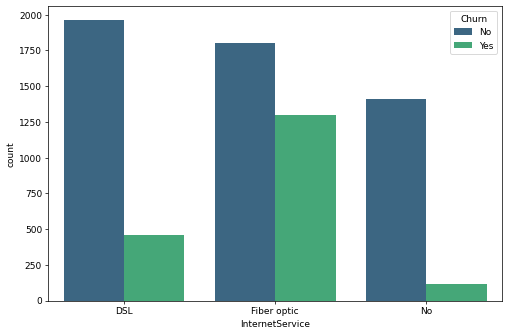

In [20]:
# plot shows the distribution of the churn on the Internet Service feature.

plt.figure(figsize=(9,6),dpi=65)
sns.countplot(data=df,x='InternetService',hue='Churn',palette='viridis')

Plot insights:
* Customers with InternetService fiber optic as part of their contract have much higher churn rate.

Data Cleaning

In [21]:
# Drop NAN values from the dataset
df.dropna(inplace=True)

In [22]:
# verify the shape once 
df.shape

(7032, 21)

Feature Engineering Actions
Based on the data types and the values, following actions are defined to preprocess/engineer the features for machine readibility and further analysis:

Columns removed which are not relevent

1. customerID

Label encoding The following features are categorical and each take on 2 values (mostly yes/no) — therefore are transformed to binary integers

1. gender
2. Partner
3. Dependents
4. Churn
5. PhoneService
6. PaperlessBilling

One-Hot Encoding The following features are categorical, yet not ordinal (no ranking) but take on more than 2 values.

1. MultipleLines
2. InternetService
3. OnlineSecurity
4. OnlineBackup
5. DeviceProtection
6. TechSupport
7. StreamingTV
8. StreamingMovies
9. Contract
10. PaymentMethod

Min-Max Scaling: Values of numerical features are rescaled between a range of 0 and 1. Min-max scaler is the standard approach for scaling.

1. tenure
2. TotalCharges
3. MonthlyCharges

Feature Engineering

In [23]:
# Drop the columns that are not required
df = df.drop(columns=['customerID'])

Feature Selection / Generation

In [24]:
# Generate a new feature "AdditionalServices" which is the sum of all the add-on service.

df ["AdditionalServices"] = (df[["OnlineSecurity","DeviceProtection","StreamingMovies","TechSupport","StreamingTV","OnlineBackup"]]=="Yes").sum(axis=1)

<AxesSubplot:xlabel='AdditionalServices', ylabel='count'>

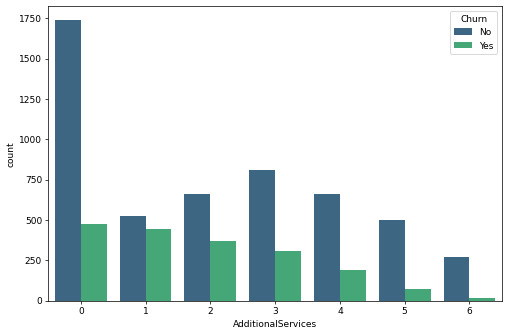

In [25]:
# plot a Additionalservice feature

plt.figure(figsize=(9,6),dpi=65)
sns.countplot(data=df,x='AdditionalServices',hue='Churn',palette='viridis')

Plot insights:
1. The countplot shows a very high churn rate for customers that have 1 additional service.
2. Customers with a very high number of additional services do have a low churn rate.

Label Encoding

In [26]:
# Label Encoding identifyed columns

feature_label = ['gender','Partner', 'Dependents','PhoneService', 'PaperlessBilling','Churn']
def label_encoding(features, df):
    for i in features:
        df[i] = df[i].map({'Yes': 1, 'No': 0})
    return

label_encoding(['Partner', 'Dependents','PhoneService', 'PaperlessBilling','Churn'], df)

# gender feature has Female and Male, so i did separately
df["gender"] = df["gender"].map({'Female': 1, 'Male': 0})

One-Hot-Encoding

In [27]:
## performing One-Hot-Encoding identified features 

feature_one = ['MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport',
 'StreamingTV','StreamingMovies', 'Contract', 'PaymentMethod','AdditionalServices']

df = pd.get_dummies(df, columns=feature_one, drop_first=True)

Feature rescaling using Min-Max scaler

In [28]:
# Min-Max Scaling of the numerical features

feature_mms = ["tenure","TotalCharges","MonthlyCharges"]
df_features_mms = pd.DataFrame(df, columns=feature_mms)
df_remaining_features = df.drop(columns=feature_mms)

mms = MinMaxScaler()
rescaled_feature = mms.fit_transform(df_features_mms)
df_rescaled_feature = pd.DataFrame(rescaled_feature, columns=feature_mms, index=df_remaining_features.index)
df = pd.concat([df_remaining_features, df_rescaled_feature], axis=1)

<AxesSubplot:>

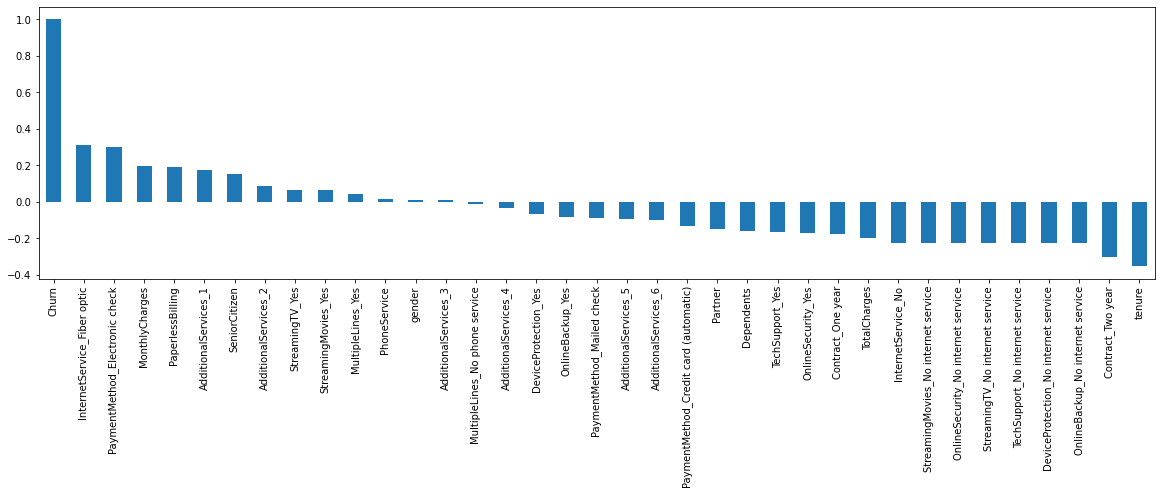

In [29]:
# corelation matrix
plt.figure(figsize=(10,10))
df.corr()["Churn"].sort_values(ascending=False).plot(kind = 'bar',figsize = (20,5))

In [30]:
### cleaned dataset
final_dataset = df.to_csv("Dataset/final_dataset.csv")